# Data Mining - Regressão
Importando alguns modulos: Numpy para computação científica, Matplotlib para a visualização em python, Scipy para estatísticas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Lendo o CSV:

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Checando se algum dado tem valor null. Se houver algum, descartaremos ou filtraremos.

In [3]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Checando os tipos de dados para cada variável. Queremos ter um senso de qual dado é numerico ou não.

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Importamos os dados do csv utilizando Pandas, e a primeira coisa que fizemos foi ter certeza que ele foi lido corretamente. Também testamos com "isnull()" se nenhum dos dados é inútil para regressão. Na vida real, uma unica coluna pode ter dados na forma de inteiros, strings ou NaN, tudo num só lugar - significando que você vai ter que checar para ter certeza de que os tipos estão corretos e são úteis para regressão. Esse dataset foi rigorosamente preparado, e isso não é algo que normalmente se vê em dados no mundo real.
## Proximo: Análise exploratória simples e resultados da regressão.
Vamos entender os dados antes de seguir em frente. É importante olhar o formato do dado - e checar duas vezes se o dado é relevante. Dado corrompido não é incomum, então é boa prática sempre checar duas vezes: na primeira, usamos df.describe() para olhar todas as variáveis em nossa análise. Na segunda, plotamos histogramas das variáveis alvo da analise usando plt.pyplot.hist(). 

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


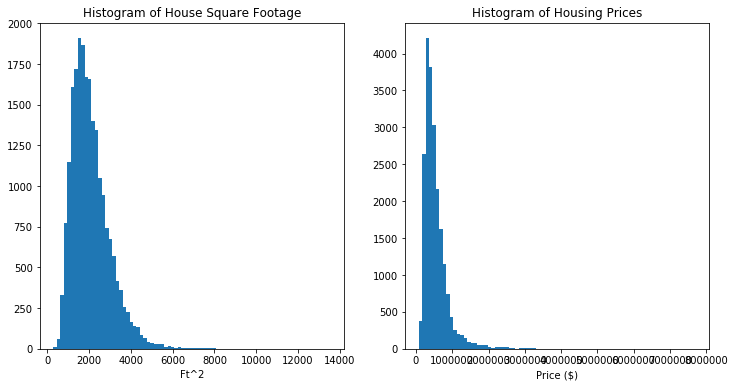

In [6]:
fig = plt.figure(figsize=(12, 6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df.sqft_living, bins=80)
sqft.set_xlabel('Ft^2')
sqft.set_title("Histogram of House Square Footage")

cost.hist(df.price, bins=80)
cost.set_xlabel('Price ($)')
cost.set_title("Histogram of Housing Prices")

plt.show()

Agora que temos um bom senso do nosso data set e sabemos as distribuições das variáveis que estamos tentando medir, vamos fazer um pouco de análise de regressão. Primeiro importamos statsmodels para pegar o estimador da menor regressão quadrática. O módulo "Ordinary Least Squares" vai fazer o trabalho.

Usando matplotlib (plt) imprimimos dois histogramas para observar a distribuição de preços de casas e área em pés quadrados. O que encontramos é que ambas as variáveis têm distribuição altamente correlacionadas.

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\augus\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Quando seu codigo produz um resumo de regressão linear com OLS com apenas duas variáveis, este será sua fórmula:
$Reg = ols('Dependent variable ~ independent variable(s), dataframe).fit()$
$print(Reg.summary())$

Quando olhamos para preço de casas e área para casas no condado de King, nós imprimimos o seguinte relatório de resumo:

In [8]:
m = ols('price ~ sqft_living', df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:51:18   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      

Quando imprimimos o resumo da regressão OLS, toda a informação relevante pode ser facilmente encontrada, incluindo R-squared, t-statistics, erro padrão, e os coeficientes de correlação. Olhando apra a saída, fica claro que há uma relação extremamente significante entre square footage e housing prices já que há um t-value extremamente alto de 144920, e um $p>|t|$ de 0% - que essensialmente significa que essa relação tem uma chance proxima de 0 de ocorrer devido variação estatística ou coincidência.
Esta relação também tem magnitude descendente - para cada 100 pés quadrados adicionais que uma casa tem, nos podemos prever que ela será 28 mil dolares mais cara que a média. É fácil ajustar a formula para incluir mais que uma variável independente, apenas seguindo a formula:
$Reg = ols('Dependent variable ~ ivar1 + ivar2 + ivar3... + ivarN,dataframe).fit()$
$print(Reg.summary())$


In [9]:
m = ols('price ~ sqft_living + bedrooms + grade + condition',df).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     6749.
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:51:18   Log-Likelihood:            -2.9884e+05
No. Observations:               21613   AIC:                         5.977e+05
Df Residuals:                   21608   BIC:                         5.977e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.398e+05   1.81e+04    -40.855      

Em nossa saida da regressão com várias variáveis acima, aprendemos que, usando variáveis independentes adicionais, como o número de quartos, podemos prover um modelo que se encaixa melhor nos dados, já que a variável R-squared para essa regressão subiu para 0,555. Isso significa que subimos da capacidade de explicar cerca de 49,3% da variação no modelo inicial para 55,5% com a adição de algumas variáveis independentes.
## Vizualizando os resultados da regressão
Ter as saidas do resumo da regressão é importante para checar a acurácia do modelo de regressão e dados para serem usados para estimativas de predição - porém, visualizar a regressão é um passo importante para comunicar os resultados da regressão em um formato mais claro.
Esta seção irá contar inteiramente com o Seaborn (sns), que tem uma função simples e intuitiva para plotar gráficos de linhas de regressão com scatterplots. Escolhemos criar um jointplot para square footage e price que mostra a linha de regressão assim como as plots de distribuição para cada variável.

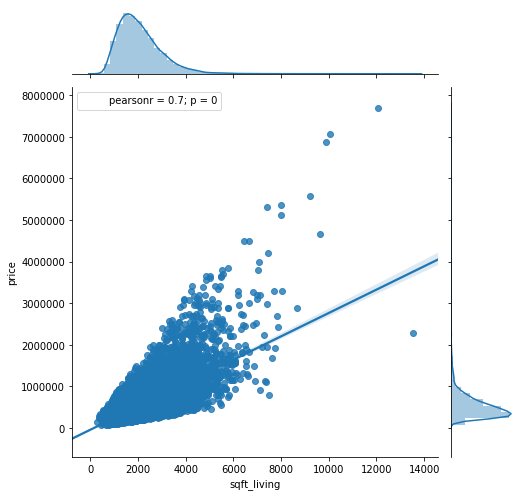

In [10]:
sns.jointplot(x="sqft_living", y="price", data=df, kind='reg', fit_reg= True, size = 7)
plt.show()

Isso concluí o exemplo de regressão. porém há muitas outras maneiras de realizar uma análise de regressão, especialmente utilizando certas técnicas.